In [1]:
import pandas as pd

file_path = '/content/City.csv'
df = pd.read_csv(file_path)
df['Population'] = df['Population'].apply(lambda x: int(x.replace(',', '')))
df['Users'] = df['Users'].apply(lambda x: int(x.replace(',', '')))
df.head()
#1 --> checking for a difference in proportion in users in each city
#2 --> checking if the average cost in each city differs from each other
#3 --> seasonality?
#4 --> Paying with cash v. card
#5 --> Income

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [ ]:
print(df.dtypes)

City          object
Population     int64
Users          int64
dtype: object


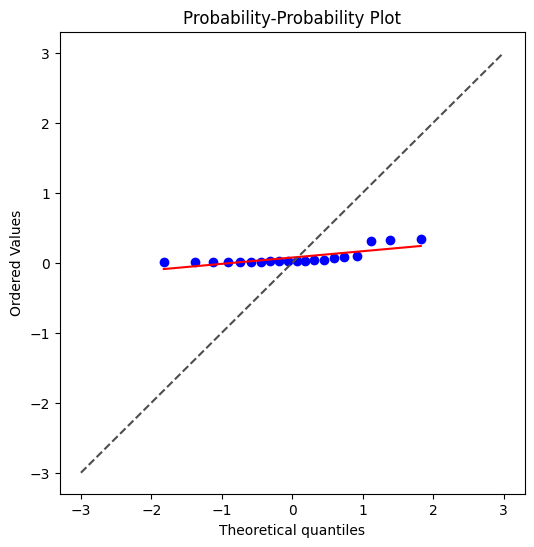

In [ ]:
1. #H0: there is no difference in proportion
   #Ha: there is a difference in proportion
#sample size is 20 --> check for norm
from scipy import stats
import matplotlib.pyplot as plt
df['User_Proportion'] = df['Users'] / df['Population']
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
res = stats.probplot(df['User_Proportion'], plot=ax)

# Add a line with slope 1 for reference
ax.plot([-3, 3], [-3, 3], ls="--", c=".3")

# Set labels and title
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered Values')
ax.set_title('Probability-Probability Plot')

plt.show()

#Data is normal, so we can use the z-score test to test for a difference in the proportions.

In [ ]:

# Define your list of proportions

df['User_Proportion'] = df['Users'] / df['Population']
print(df)
# Calculate the overall proportion of users to the total population
overall_user_proportion = df['Users'].sum() / df['Population'].sum()

# Calculate the standard error of the proportion
df['Standard_Error'] = df.apply(lambda row: (row['User_Proportion'] * (1 - row['User_Proportion'])), axis=1)

#print(df['Standard_Error'])
# Calculate the z-score for each city (xbar - mu)/(standard error)
df['Z_Score'] = (df['User_Proportion'] - overall_user_proportion) / df['Standard_Error']

# Perform a two-tailed z-test
alpha = 0.05
critical_value = stats.norm.ppf(1 - alpha / 2)  # 95% confidence level
df['Significant'] = df['Z_Score'].abs() > critical_value
#Lower proportion means lower z-score, displaying significance
print(df[['City', 'Z_Score', 'Significant']])


                City  Population   Users  User_Proportion
0        NEW YORK NY     8405837  302149         0.035945
1         CHICAGO IL     1955130  164468         0.084121
2     LOS ANGELES CA     1595037  144132         0.090363
3           MIAMI FL     1339155   17675         0.013199
4     SILICON VALLEY     1177609   27247         0.023138
5      ORANGE COUNTY     1030185   12994         0.012613
6       SAN DIEGO CA      959307   69995         0.072964
7         PHOENIX AZ      943999    6133         0.006497
8          DALLAS TX      942908   22157         0.023499
9         ATLANTA GA      814885   24701         0.030312
10         DENVER CO      754233   12421         0.016468
11         AUSTIN TX      698371   14978         0.021447
12        SEATTLE WA      671238   25063         0.037338
13         TUCSON AZ      631442    5712         0.009046
14  SAN FRANCISCO CA      629591  213609         0.339282
15     SACRAMENTO CA      545776    7044         0.012906
16     PITTSBU

Based on this test, we can see that there is a difference in proportions between the cities. When looking at the data more critically,  cities labeled as "False" (San Francisco, Washington DC, Seattle) tend to have a higher proportion of users compared to others.  Based on this, I formulated a second hypothesis to test if there are more users in cities with higher cost.

In [ ]:
#2 --> checking if the profits between each city/company differs from each other
#Ho: the  doesn't differ
#Ha: the average cost does differ
file_path2 = '/content/Cab_Data.csv'
df2 = pd.read_csv(file_path2)
df2.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/8/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/8/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/8/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/8/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
import numpy as np
from scipy.stats import t

df2['Profit'] = df2['Price Charged'] - df2['Cost of Trip']
total_profit_company_per_km = df2.groupby('Company')[['Profit']].sum()
print(total_profit_company_per_km['Profit'] )
pink_cab_prices = df2[df2['Company'] == 'Pink Cab']['Profit']
yellow_cab_prices = df2[df2['Company'] == 'Yellow Cab']['Profit']

# Calculate sample sizes
n1 = len(pink_cab_prices)
n2 = len(yellow_cab_prices)

print(n1)
print(n2)

#sample sizes are huge, meaning a t-test is reasonable to perform in this instance.
# Calculate sample means
mean_pink = np.mean(pink_cab_prices)
mean_yellow = np.mean(yellow_cab_prices)

# Calculate sample standard deviations
std_pink = np.std(pink_cab_prices, ddof=1)  # Use ddof=1 for unbiased estimator
std_yellow = np.std(yellow_cab_prices, ddof=1)

# Calculate standard error of the difference in means
se_diff_means = np.sqrt((std_pink**2 / n1) + (std_yellow**2 / n2))

# Calculate t-statistic
t_statistic = (mean_pink - mean_yellow) / se_diff_means

# Degrees of freedom
df = n1 + n2 - 2

# Critical value for two-tailed test at 95% confidence level
alpha = 0.05
t_critical = np.abs(t.ppf(alpha / 2, df))  # Use t-distribution

# Compare t-statistic with critical value
if np.abs(t_statistic) > t_critical:
    print("Reject null hypothesis. There is a significant difference in prices charged.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in prices charged.")



Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64
84711
274681
Reject null hypothesis. There is a significant difference in prices charged.


Based on the t-test, we conclude a significant different in the profits between the two companies. The yellow cab company incorporates a higher net profit,

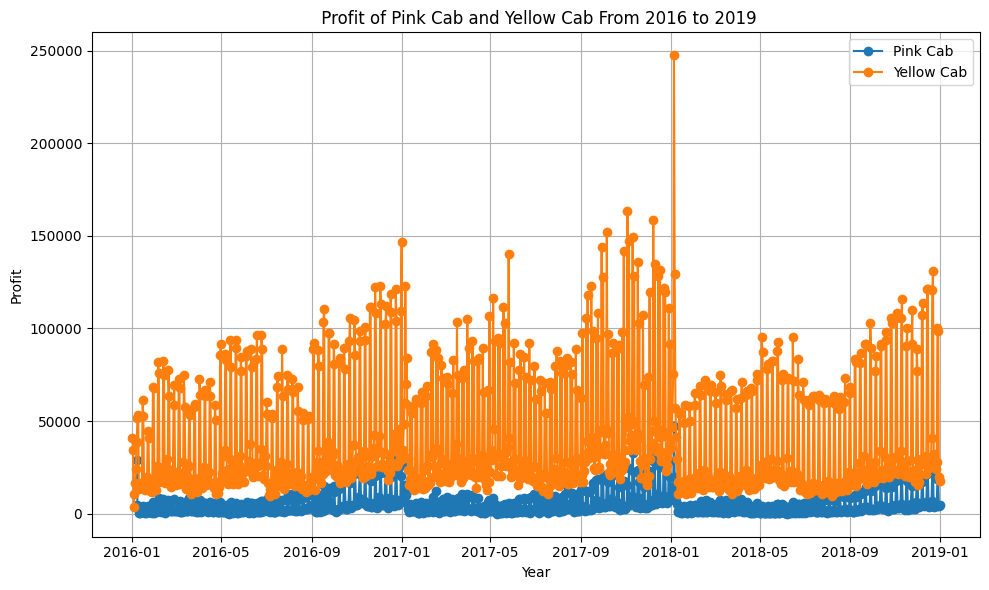

In [ ]:
# Group by company and year, then sum up the profits
total_profit_company_per_year = df2.groupby(['Company', 'Date of Travel'])[['Profit']].sum().unstack(level=0)

# Plotting
plt.figure(figsize=(10, 6))

# Plot for Pink Cab
plt.plot(total_profit_company_per_year.index, total_profit_company_per_year[('Profit', 'Pink Cab')], marker='o', label='Pink Cab')

# Plot for Yellow Cab
plt.plot(total_profit_company_per_year.index, total_profit_company_per_year[('Profit', 'Yellow Cab')], marker='o', label='Yellow Cab')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title(' Profit of Pink Cab and Yellow Cab From 2016 to 2019')

# Adding legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.xticks()  # Ensure all years are shown on the x-axis
plt.tight_layout()
plt.show()

In [ ]:
#3 Testing for association between age and income
file_path3 = '/content/Customer_ID.csv'
df3 = pd.read_csv(file_path3)
df3.head()
len(df3)

49171

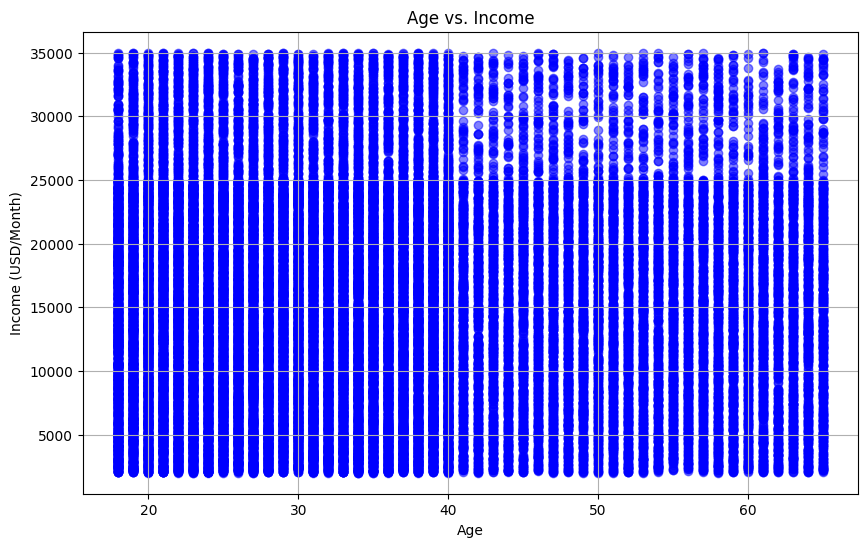

In [ ]:
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Plot age against income
plt.scatter(df3['Age'], df3['Income (USD/Month)'], color='blue', alpha=0.5)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Income (USD/Month)')
plt.title('Age vs. Income')

# Show grid
plt.grid(True)

# Show plot
plt.show()

In [ ]:
import numpy as np
# Convert lists to NumPy arrays
x_array = np.array(df3['Age'])
y_array = np.array(df3['Income (USD/Month)'])

# Calculate means
mean_x = np.mean(x_array)
mean_y = np.mean(y_array)

# Calculate Pearson correlation coefficient
numerator = np.sum((x_array - mean_x) * (y_array - mean_y))
denominator = np.sqrt(np.sum((x_array - mean_x)**2) * np.sum((y_array - mean_y)**2))
corr_coef = numerator / denominator

print("Pearson correlation coefficient:", corr_coef)


#There is no linear association, but I suspect a quadratic association based on data inspection

Pearson correlation coefficient: 0.0001563390369167492


In [ ]:
# Create quadratic features
X = np.column_stack([x_array, x_array**2])

# Add a column of ones for the intercept term
X = np.column_stack([np.ones_like(x_array), X])

# Perform ordinary least squares (OLS) regression
coefficients = np.linalg.lstsq(X, y_array, rcond=None)[0]

# Extract coefficients
intercept, coef_linear, coef_quadratic = coefficients

# Compute predicted y values
y_pred = intercept + coef_linear * x_array + coef_quadratic * x_array**2

# Compute total sum of squares (TSS)
y_mean = np.mean(y_array)
TSS = np.sum((y_array - y_mean)**2)

# Compute residual sum of squares (RSS)
RSS = np.sum((y_array - y_pred)**2)

# Compute coefficient of determination (R^2)
R_squared = 1 - (RSS / TSS)

print("Coefficient of determination (R^2):", R_squared)

Coefficient of determination (R^2): 3.2640100255942883e-07


In [ ]:
#Conclusion: There is no association between age and income.

#Now looking at if a customer's income is different between those that paid by card vs. paying by cash
file_path4 = '/content/Transaction_ID.csv'
df4 = pd.read_csv(file_path4)
df4.head()

#Ho: Card income = Cash income
#Ha: Card income /= Cash income

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
merged_transaction = pd.merge(df3,df4, on = 'Customer ID')
merged_transaction.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [ ]:
from scipy.stats import t
income_cash = merged_transaction[merged_transaction['Payment_Mode'] == 'Cash']['Income (USD/Month)']
income_card = merged_transaction[merged_transaction['Payment_Mode'] == 'Card']['Income (USD/Month)']
print(len(income_cash))
print(len(income_card))
#Sample sizes are large so we can incorporate a t-test

# Calculate the means and variances of incomes for cash and card payments
mean_cash = income_cash.mean()
mean_card = income_card.mean()
var_cash = income_cash.var()
var_card = income_card.var()
n_cash = len(income_cash)
n_card = len(income_card)
# Calculate the pooled standard deviation
pooled_std = np.sqrt((var_cash * (n_cash - 1) + var_card * (n_card - 1)) / (n_cash + n_card - 2))

# Calculate the t-statistic (Xbar1 - xbar2)/ (std * Sqrt((1/n1) + (1/n2)))
t_statistic = (mean_cash - mean_card) / (pooled_std * np.sqrt(1 / n_cash + 1 / n_card))

# Calculate the degrees of freedom
df = n_cash + n_card - 2

# Calculate the p-value using the cumulative distribution function of the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))

print("t-statistic:", t_statistic)
print("p-value:", p_value)

176107
263991
t-statistic: 0.6872006814459101
p-value: 0.4919566371234092


We fail to reject the null hypothesis, indicating there is no difference in income between those who pay via card versus cash. Some people just prefer to pay via cash.

In [ ]:
#5 Is there seasonality in the data?
df2.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/8/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/8/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/8/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/8/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


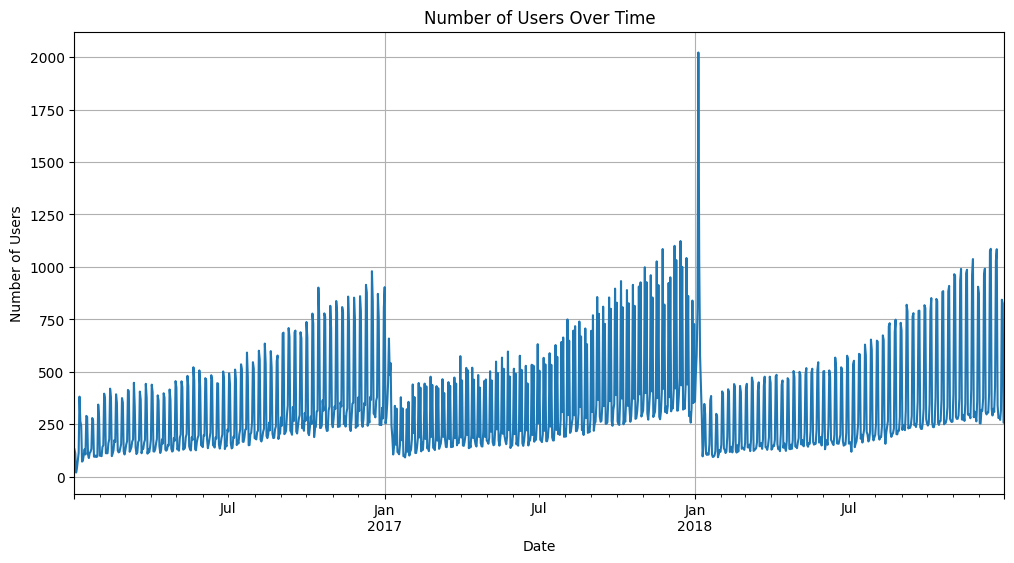

In [ ]:
import matplotlib.pyplot as plt
df2['Date of Travel'] = pd.to_datetime(df2['Date of Travel'])

# Group by 'Date of Travel' and count the number of transactions (users) for each date
user_counts = df2.groupby('Date of Travel').size()

# Plot the time series of user counts
plt.figure(figsize=(12, 6))
user_counts.plot()
plt.title('Number of Users Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

Based on the data, I see a certain seasonality component. As the winter time approaches, there appears to be more users than usual. This could be due to the fact that the weather gets colder than usual, prompting an increase in ride services.